# Grid world path optimization using genetic algorithms

## Importing modules

In [1]:
import os
from typing import List, Tuple

import matplotlib.pyplot as plt

from IPython.display import Video

import functions as fn
import simulations as sm

## Parameters

In [2]:
# Grid parameters
GRID_SIZE: Tuple[int, int] = (10, 15)
START_POSITION: Tuple[int, int] = (6, 1)
END_POSITION: Tuple[int, int] = (4, 13)
OBSTACLES: List[Tuple[int, int]] = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14),
    (1, 0), (1, 3), (1, 14), (2, 0), (2, 3), (2, 5), (2, 6), (2, 7), (2, 11), (2, 14), (3, 0), (3, 3), (3, 10), (3, 11), (3, 14), 
    (4, 0), (4, 3), (4, 9), (4, 10), (4, 11), (4, 14), (5, 0), (5, 3), (5, 6), (5, 11), (5, 13), (5, 14), (6, 0), (6, 6), (6, 9), 
    (6, 11), (6, 14), (7, 0), (7, 6), (7, 9), (7, 14), (8, 0), (8, 3), (8, 6), (8, 14), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), 
    (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14)
]
NUM_OPTIMAL_STEPS: int = 20

# Simulation parameters
CHROMOSOME_LENGTH: int = 64
POPULATION_SIZE: int = 100
NUM_GENERATIONS: int = 1000
BIAS: int = 3
PROGRESSIVE_MUTATION: bool = False
MUTATION_RATE: float = 0.01
EARLY_STOP: bool = False
BEST_ONES_PERCENTAGE: float = 0.05
WORST_ONES_PERCENTAGE: float = 0.2

# Visualization
WINDOW_SIZE: int = 10

# Paths
RESULTS_PATH: str = "./results"
GA_RESULTS_PATH: str = f"{RESULTS_PATH}/GA results"
GA_VERSION_PATH: str = f"{GA_RESULTS_PATH}/regular mutation" if not PROGRESSIVE_MUTATION else f"{GA_RESULTS_PATH}/progressive mutation"
ALL_TO_ALL_RESULTS_PATH: str = f"{GA_VERSION_PATH}/all to all results"
ALL_TO_ALL_VIDEO_PATH: str = f"{GA_VERSION_PATH}/all_to_all_results.mp4"
BEST_TO_REST_RESULTS_PATH: str = f"{GA_VERSION_PATH}/best to rest results"
BEST_TO_REST_VIDEO_PATH: str = f"{GA_VERSION_PATH}/best_to_rest_results.mp4"
HYBRID_RESULTS_PATH: str = f"{GA_VERSION_PATH}/hybrid results"
HYBRID_VIDEO_PATH: str = f"{GA_VERSION_PATH}/hybrid_results.mp4"

# Other
RANDOM_STATE: int = 42
LINE: str = 100*'-'
DOUBLE_LINE: str = 100*'='
SIMULATION_STARTED: str = 36*'-' + " !!! SIMULATION STARTED !!! " + 36*'-'
SIMULATION_FINISHED: str = 36*'-' + " !!! SIMULATION FINISHED !!! " + 35*'-'

## Results directories creation

In [3]:
os.makedirs(RESULTS_PATH, exist_ok=True)
os.makedirs(GA_RESULTS_PATH, exist_ok=True)
for directory in [GA_VERSION_PATH, ALL_TO_ALL_RESULTS_PATH, BEST_TO_REST_RESULTS_PATH, HYBRID_RESULTS_PATH]:
    fn.create_or_empty_directory(directory)

## Grid world initialization

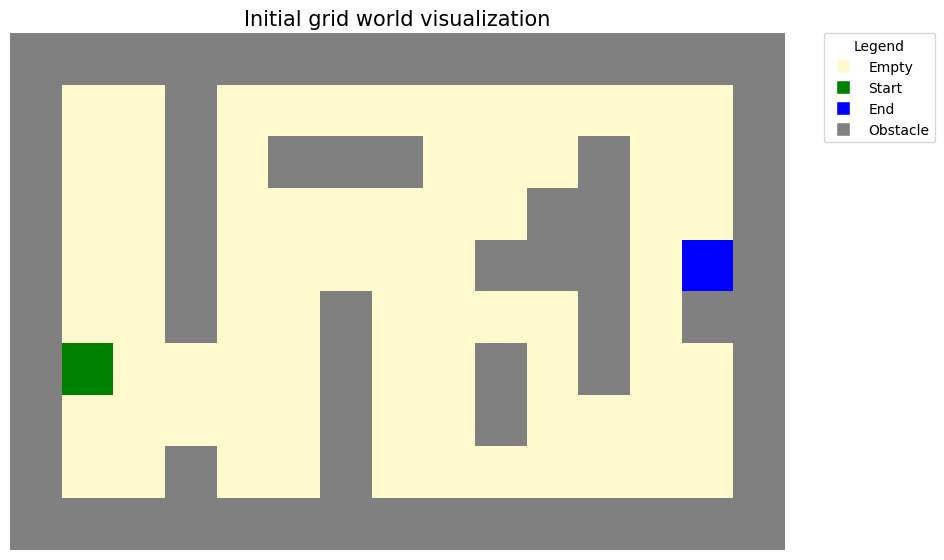

In [4]:
initial_grid_world = fn.grid_world_creation(GRID_SIZE, START_POSITION, END_POSITION, OBSTACLES)
fn.grid_world_visualization(initial_grid_world,title="Initial grid world visualization", agent_flag=0)

## All to all crossover case

### Simulation

In [5]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    mutation_rate=MUTATION_RATE,
    crossover_type="all to all",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE  
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 7.6158 - median score: 13.0384 - mean score: 12.3664 - steps: 10
----------------------------------------------------------------------------------------------------
 10. generation finished - best score: 3.1623 - median score: 7.448 - mean score: 8.2841 - steps: 30
----------------------------------------------------------------------------------------------------
 20. generation finished - best score: 3.0 - median score: 7.0711 - mean score: 7.3503 - steps: 15
----------------------------------------------------------------------------------------------------
 30. generation finished - best score: 2.2361 - median score: 4.0 - mean score: 5.2654 - steps: 15
----------------------------------------------------------------------------------------------------
 40. generation finished - best score: 2.2361 - median score: 3.0 - mean score: 4.7725 - step

### Result scores visualization

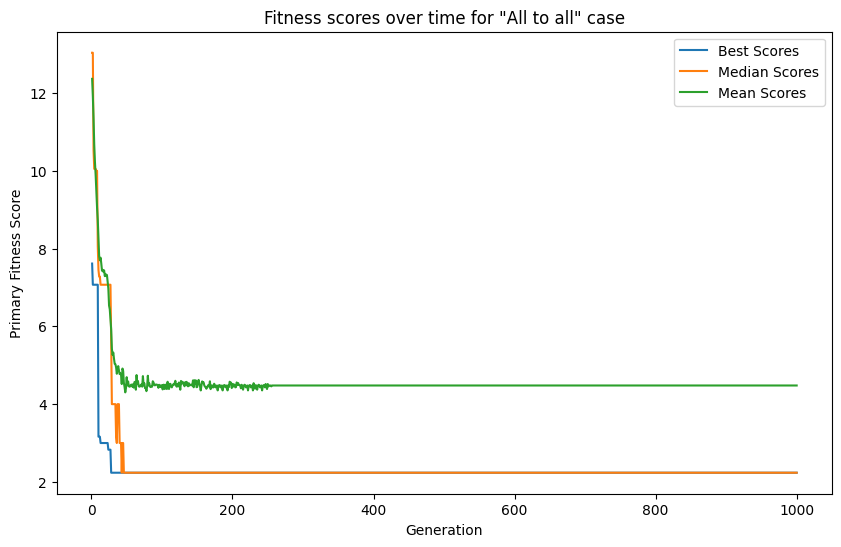

In [6]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for \"All to all\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

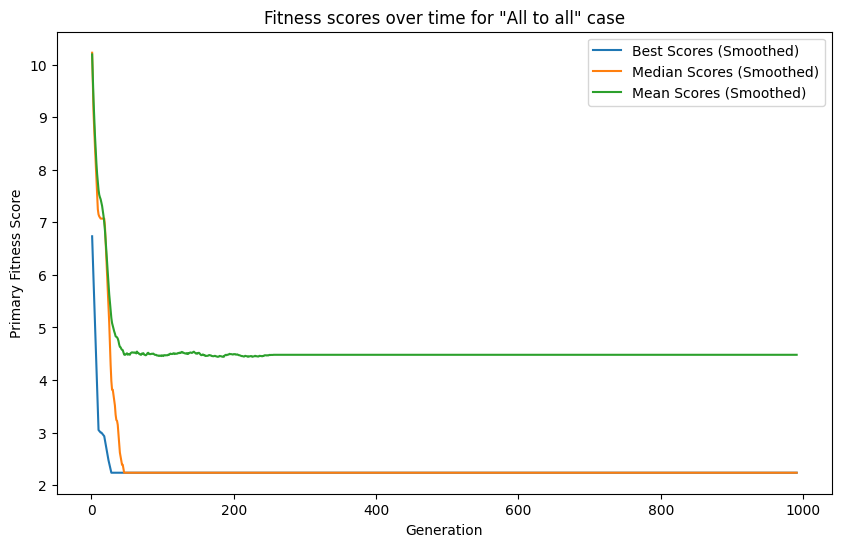

In [7]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for \"All to all\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


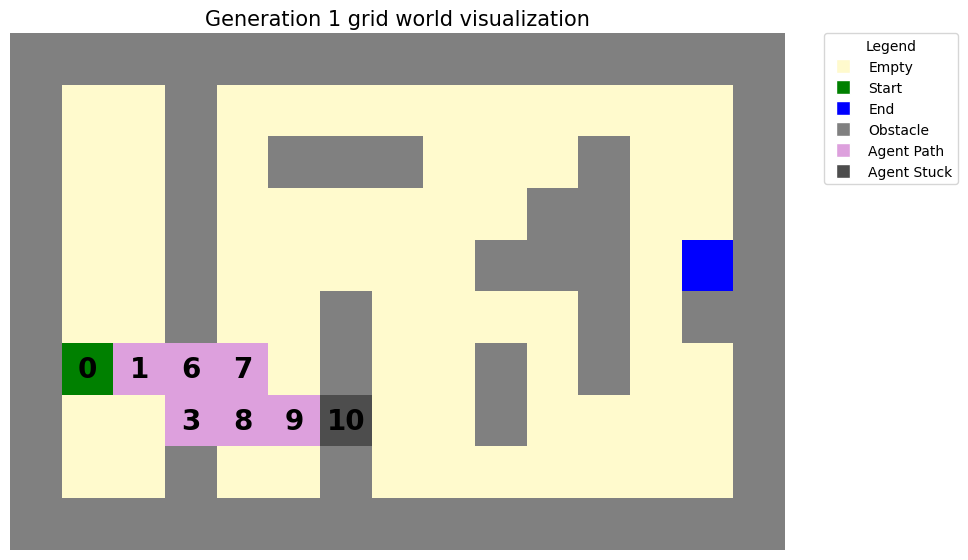

----------------------------------------------------------------------------------------------------

2. generation 30 grid world


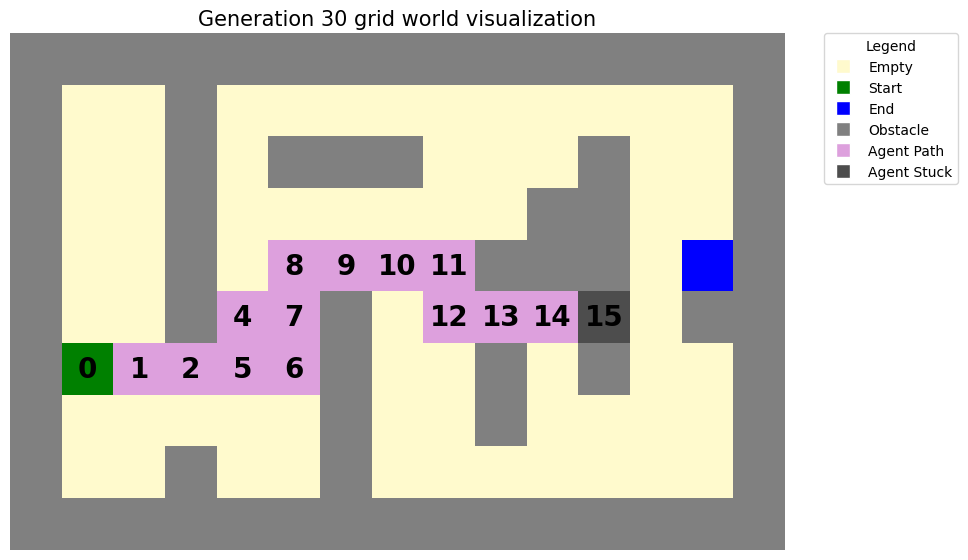

----------------------------------------------------------------------------------------------------

3. generation 100 grid world


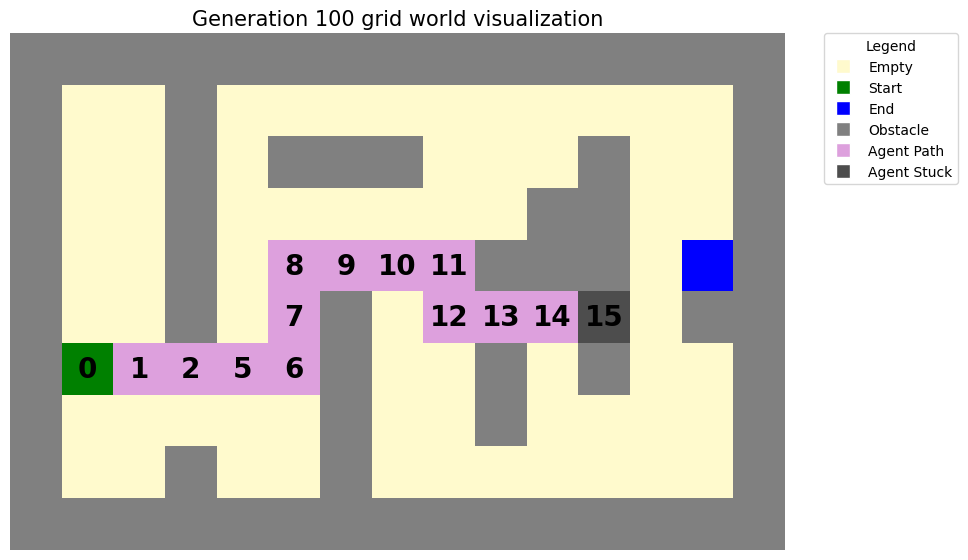

----------------------------------------------------------------------------------------------------

4. generation 200 grid world


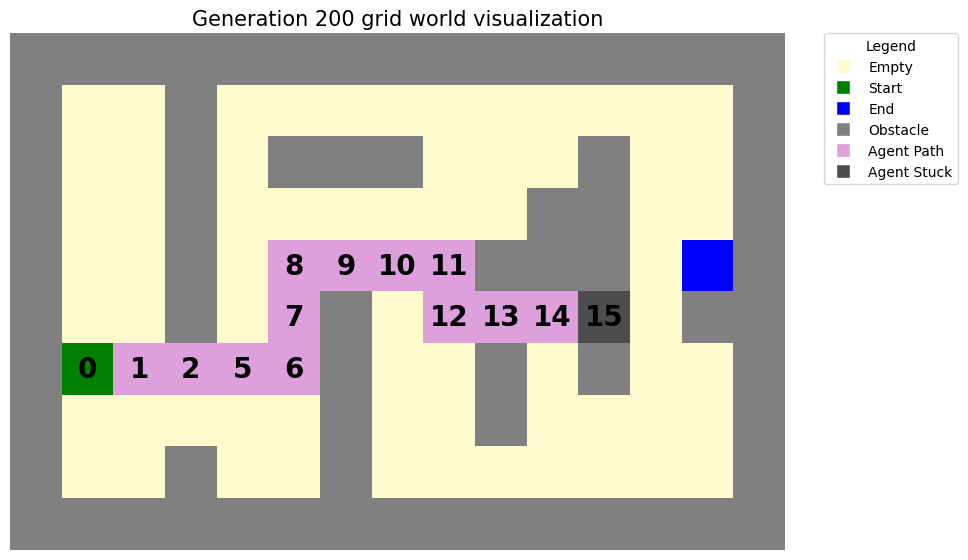

----------------------------------------------------------------------------------------------------

5. generation 300 grid world


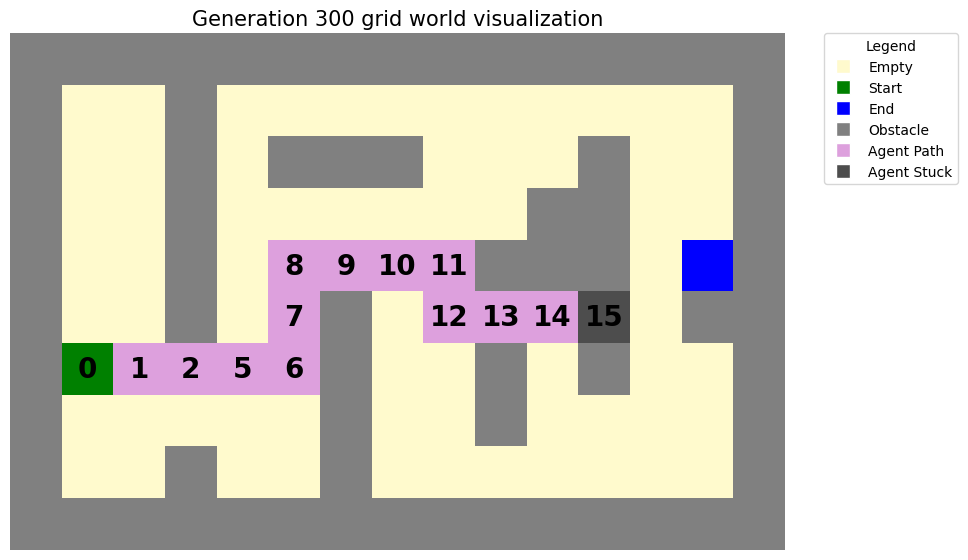

----------------------------------------------------------------------------------------------------

6. generation 400 grid world


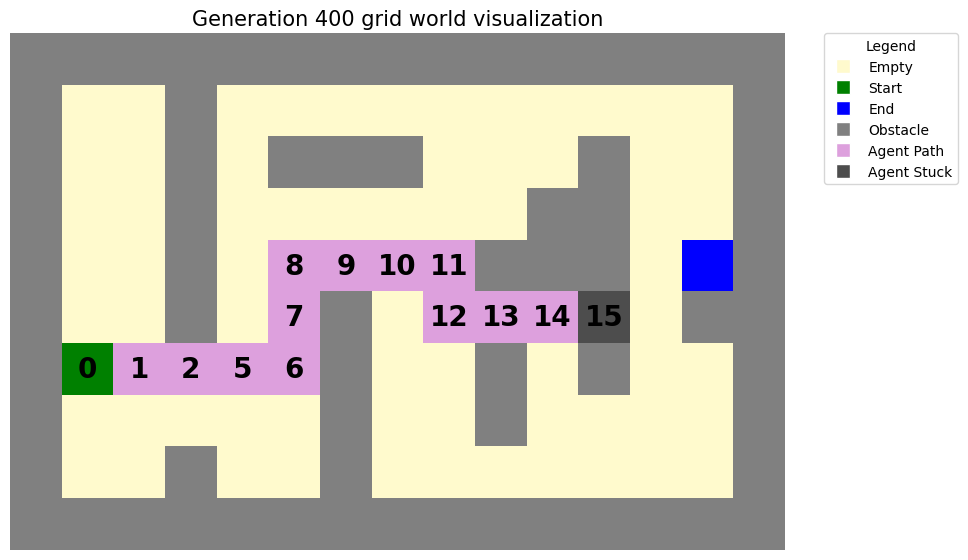

----------------------------------------------------------------------------------------------------

7. generation 500 grid world


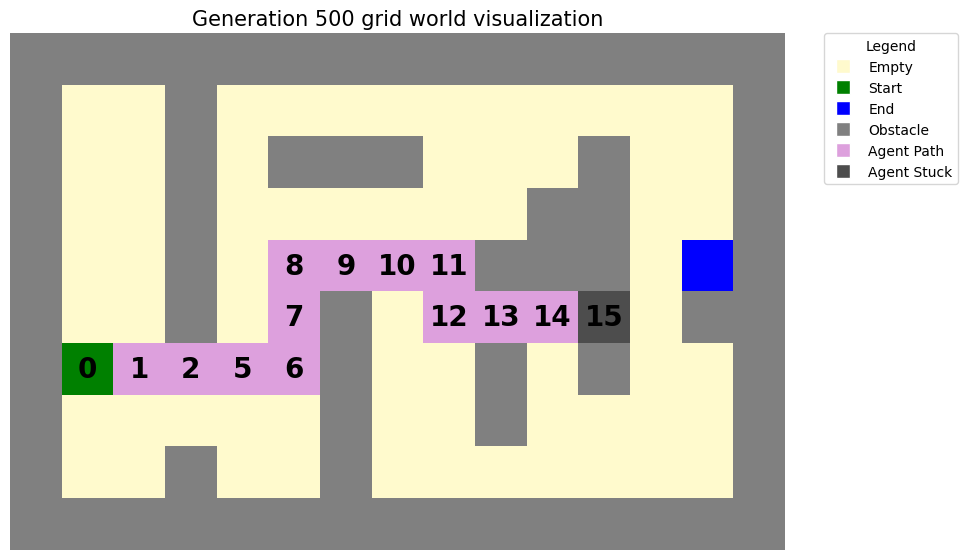

----------------------------------------------------------------------------------------------------

8. generation 600 grid world


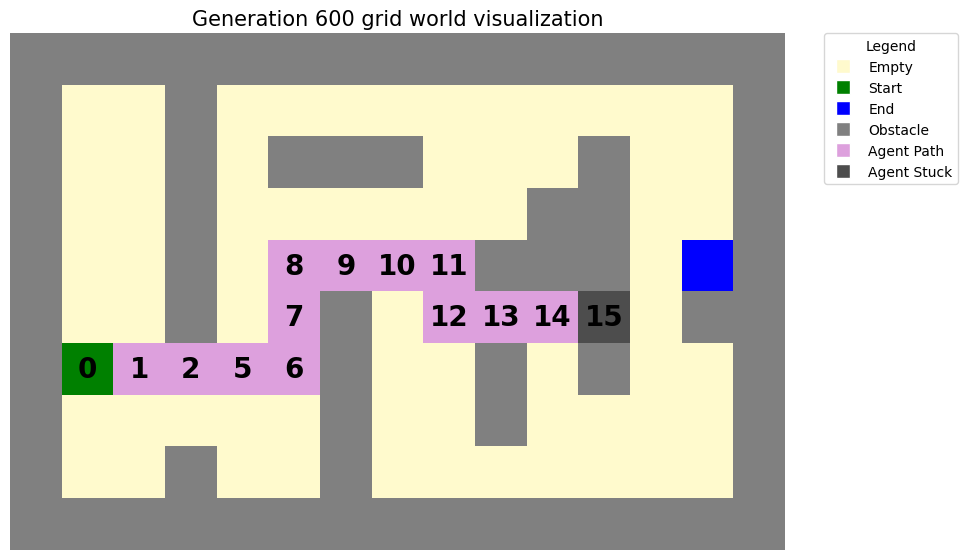

----------------------------------------------------------------------------------------------------

9. generation 700 grid world


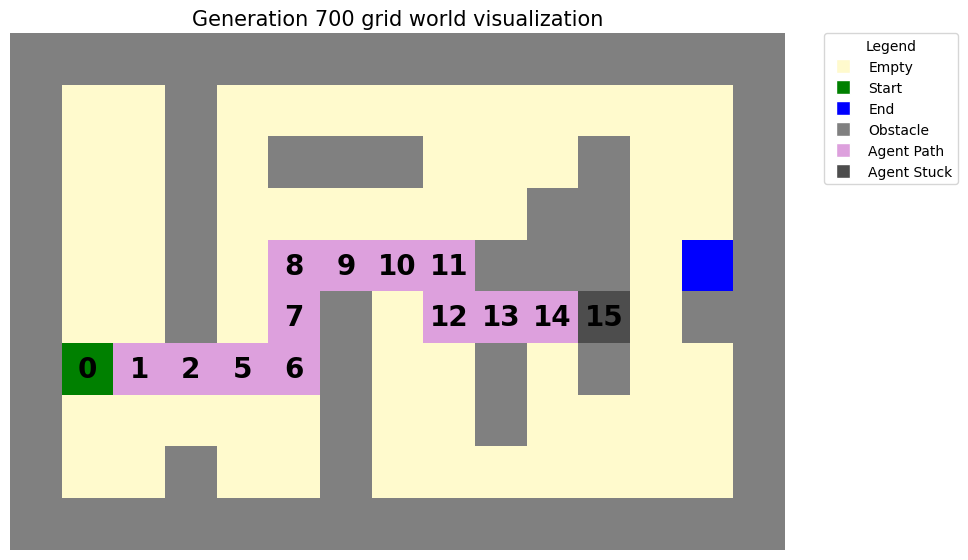

----------------------------------------------------------------------------------------------------

10. generation 800 grid world


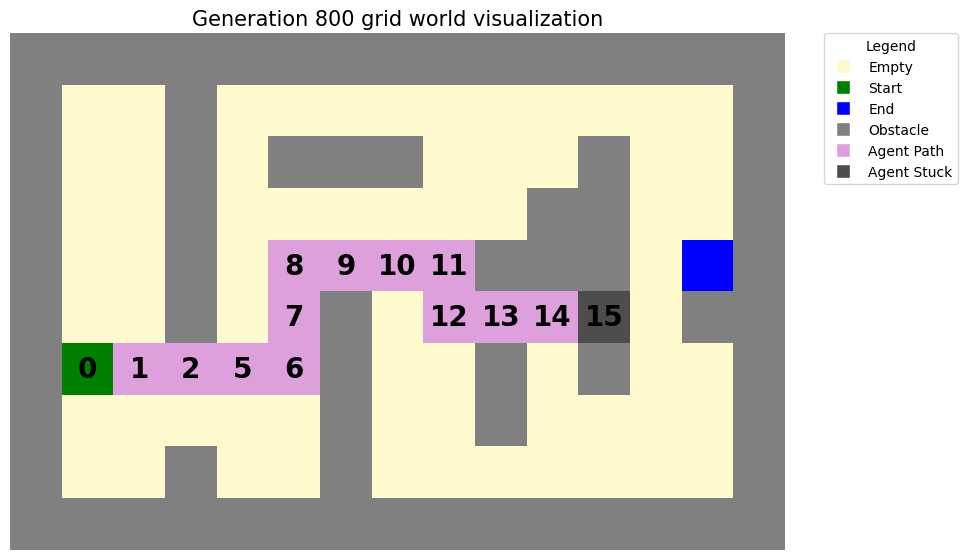

----------------------------------------------------------------------------------------------------

11. generation 900 grid world


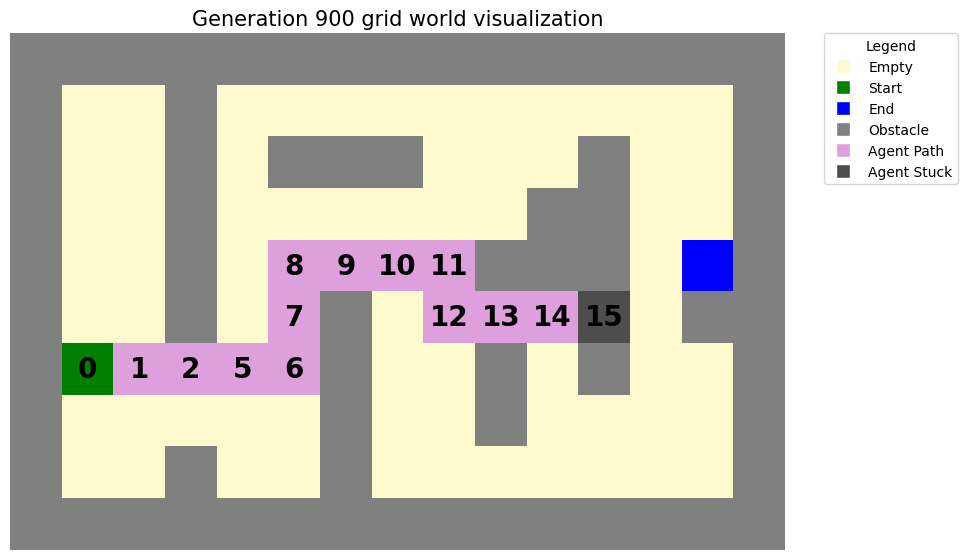

----------------------------------------------------------------------------------------------------

12. generation 1000 grid world


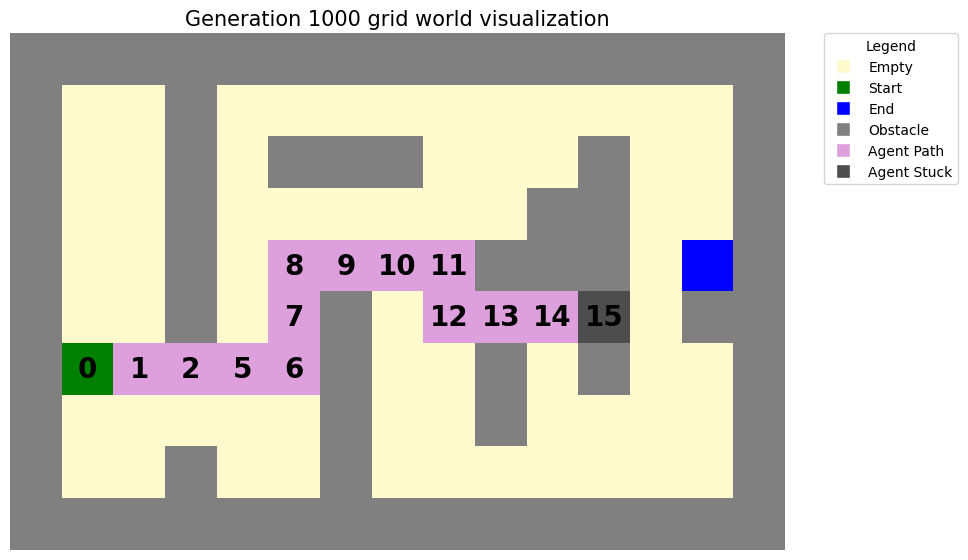

----------------------------------------------------------------------------------------------------



In [8]:
generation_step = generation // 10

counter = 1
for generation, grid_world in enumerate(best_grid_worlds, 1):
    if generation == 1 or generation == best_generation or generation%generation_step == 0:
        print(f"{counter}. generation {generation} grid world")
        title = f"Generation {generation} grid world visualization"
        fn.grid_world_visualization(grid_world, agent_path=best_population_paths[generation-1], title=title, agent_flag=1)
        print(LINE)
        print()
        counter += 1

In [9]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=ALL_TO_ALL_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    step=generation_step, 
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(ALL_TO_ALL_RESULTS_PATH, ALL_TO_ALL_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 11/11 [01:37<00:00,  8.90s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/regular mutation/all_to_all_results.mp4
Video creation finished!


frame=  171 fps= 78 q=-1.0 Lsize=     189kB time=00:00:33.60 bitrate=  46.2kbits/s speed=15.3x    
video:187kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.334044%
[libx264 @ 0x55810b985740] frame I:1     Avg QP: 9.03  size: 15587
[libx264 @ 0x55810b985740] frame P:128   Avg QP:14.31  size:  1253
[libx264 @ 0x55810b985740] frame B:42    Avg QP:12.25  size:   352
[libx264 @ 0x55810b985740] consecutive B-frames: 50.9% 49.1%  0.0%  0.0%
[libx264 @ 0x55810b985740] mb I  I16..4: 85.7%  5.6%  8.7%
[libx264 @ 0x55810b985740] mb P  I16..4:  1.2%  0.4%  0.6%  P16..4:  1.2%  0.1%  0.1%  0.0%  0.0%    skip:96.3%
[libx264 @ 0x55810b985740] mb B  I16..4:  0.7%  0.1%  0.1%  B16..8:  1.5%  0.2%  0.0%  direct: 0.0%  skip:97.3%  L0:59.1% L1:39.5% BI: 1.4%
[libx264 @ 0x55810b985740] 8x8 transform intra:13.4% inter:54.7%
[libx264 @ 0x55810b985740] coded y,uvDC,uvAC intra: 12.2% 30.2% 24.4% inter: 0.4% 0.5% 0.4%
[libx264 @ 0x55810b985740] i16 v,h,dc,p: 71% 28%  1%  0%
[li

In [10]:
Video(ALL_TO_ALL_VIDEO_PATH, embed=True)

## The best ones to rest crossover case

### Simulation

In [11]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    mutation_rate=MUTATION_RATE,
    crossover_type="best to rest",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE    
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 7.6158 - median score: 13.0384 - mean score: 12.3664 - steps: 10
----------------------------------------------------------------------------------------------------
 10. generation finished - best score: 3.0 - median score: 7.0711 - mean score: 7.2725 - steps: 31
----------------------------------------------------------------------------------------------------
 20. generation finished - best score: 3.0 - median score: 5.099 - mean score: 6.6023 - steps: 31
----------------------------------------------------------------------------------------------------
 30. generation finished - best score: 3.0 - median score: 7.0711 - mean score: 7.0115 - steps: 31
----------------------------------------------------------------------------------------------------
 40. generation finished - best score: 3.0 - median score: 7.0711 - mean score: 6.9117 - steps: 

### Result scores visualization

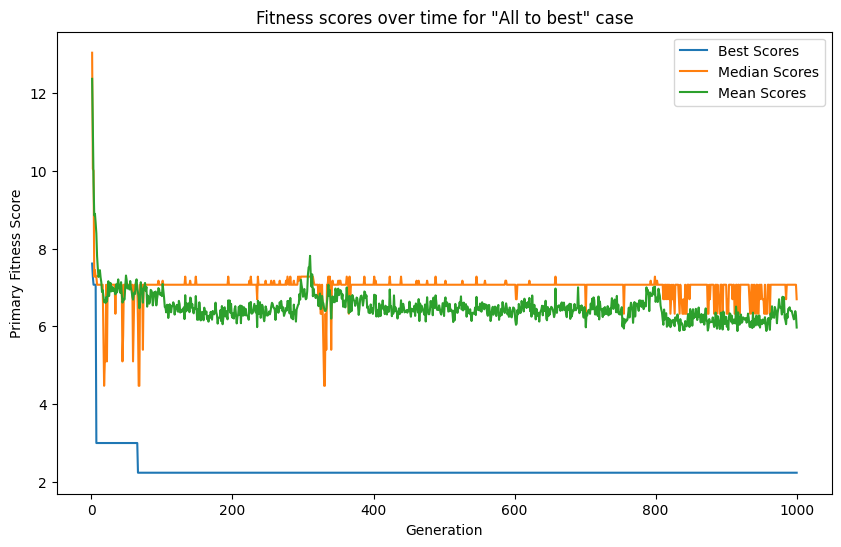

In [12]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for \"All to best\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

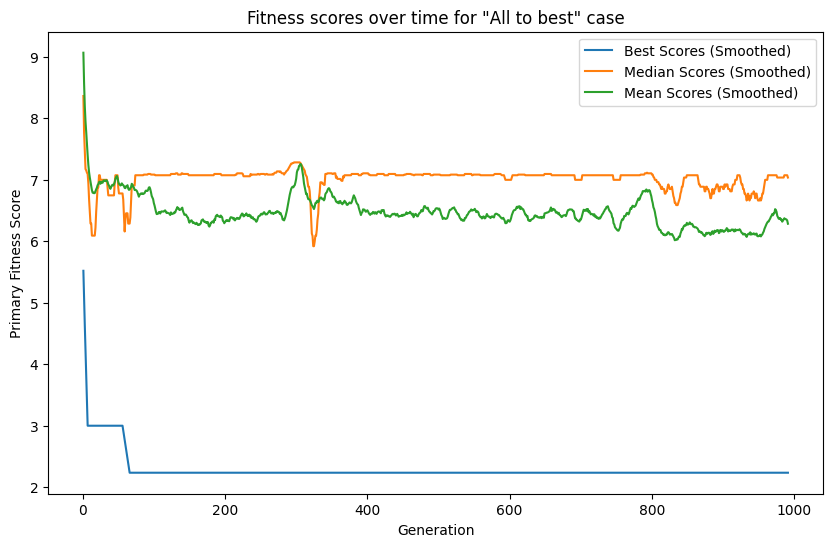

In [13]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for \"All to best\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


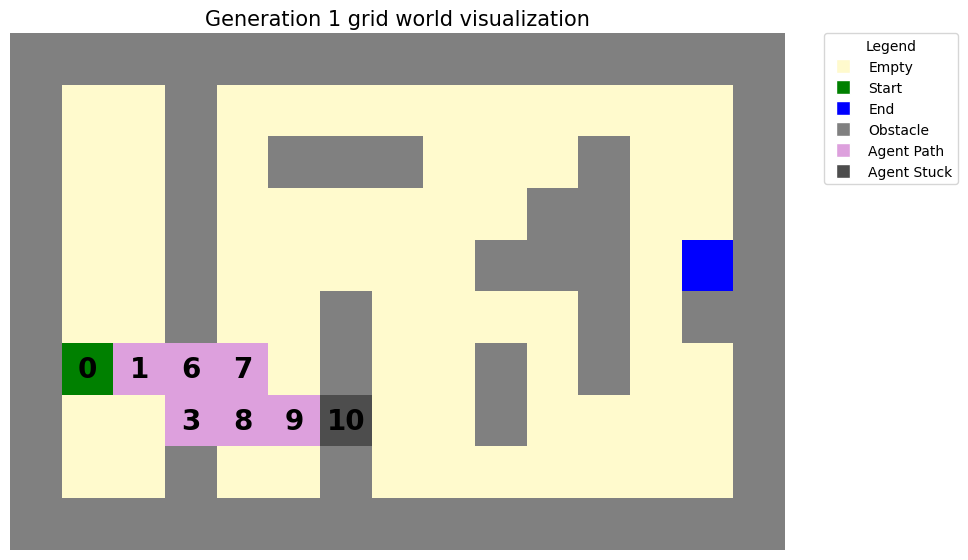

----------------------------------------------------------------------------------------------------

2. generation 66 grid world


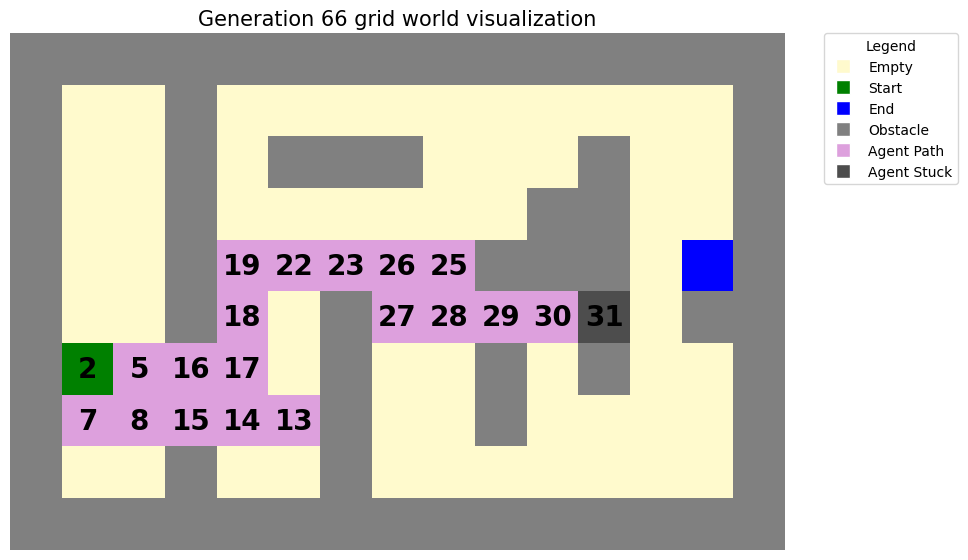

----------------------------------------------------------------------------------------------------

3. generation 100 grid world


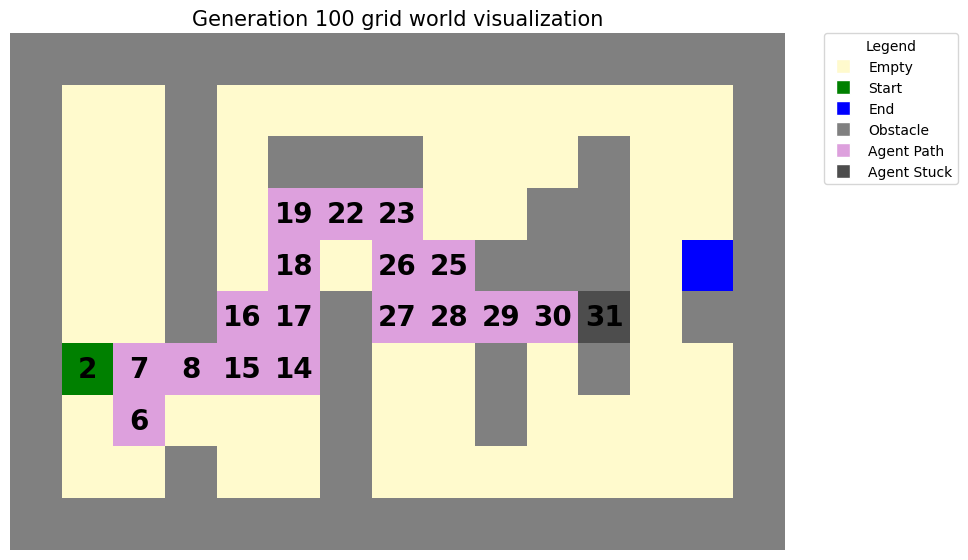

----------------------------------------------------------------------------------------------------

4. generation 200 grid world


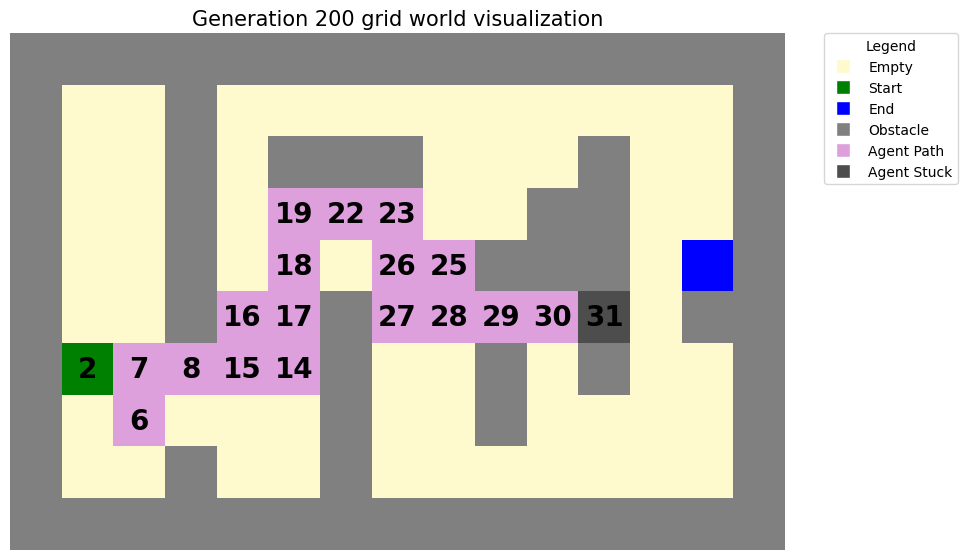

----------------------------------------------------------------------------------------------------

5. generation 300 grid world


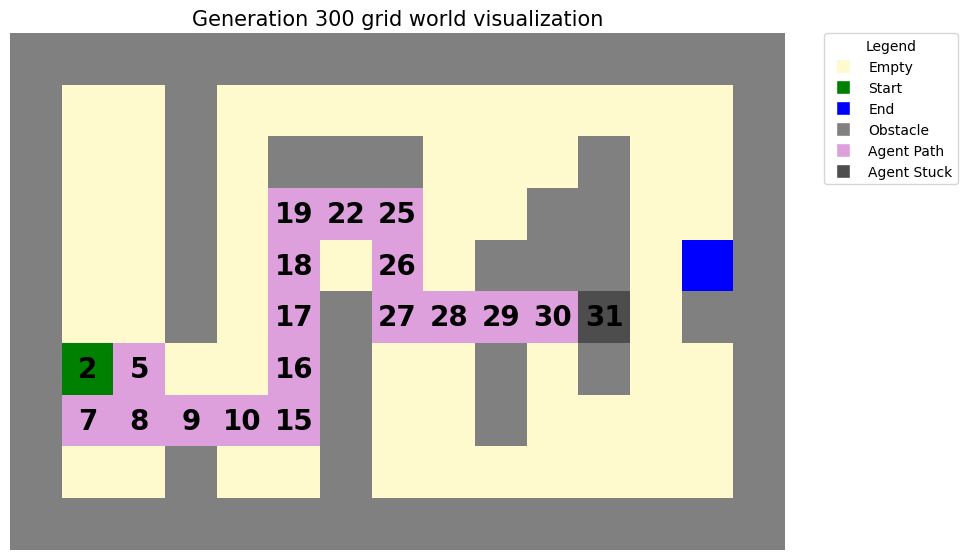

----------------------------------------------------------------------------------------------------

6. generation 400 grid world


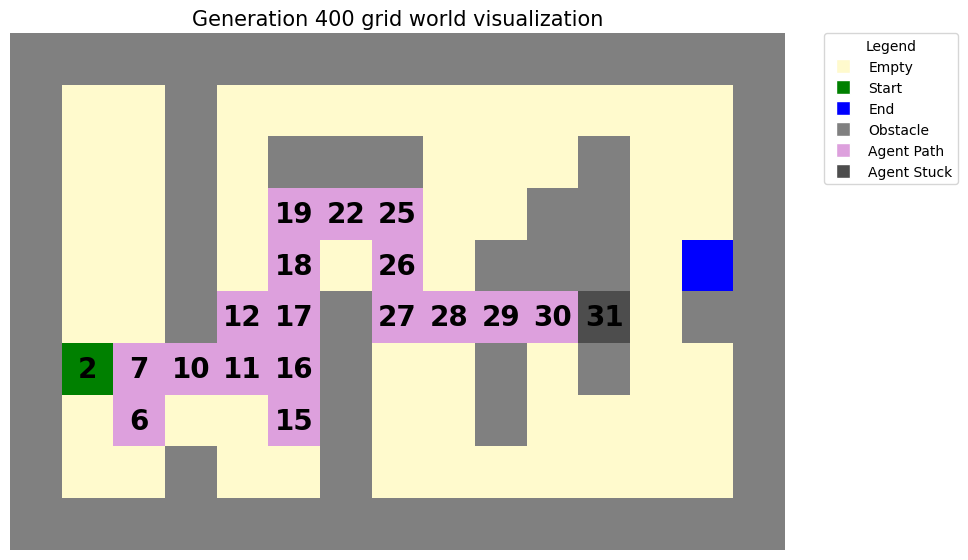

----------------------------------------------------------------------------------------------------

7. generation 500 grid world


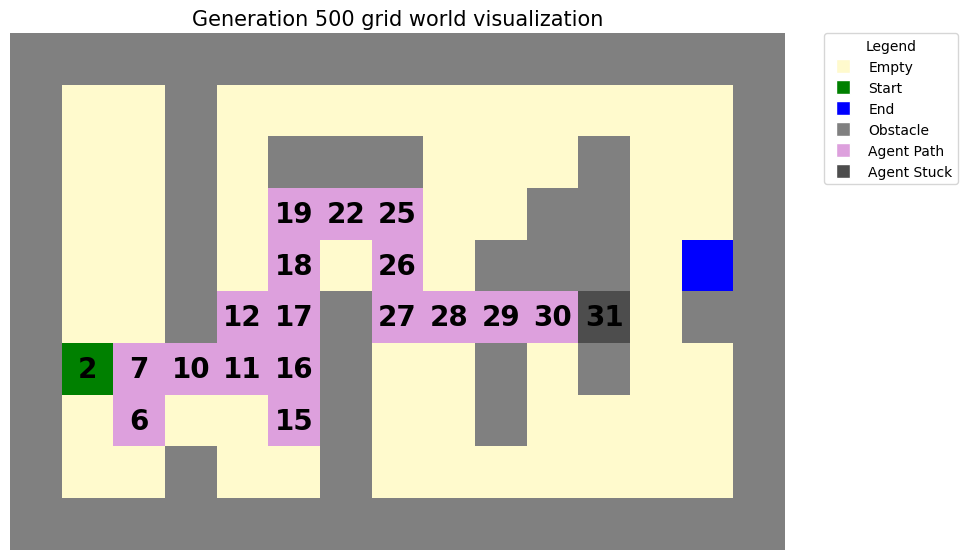

----------------------------------------------------------------------------------------------------

8. generation 600 grid world


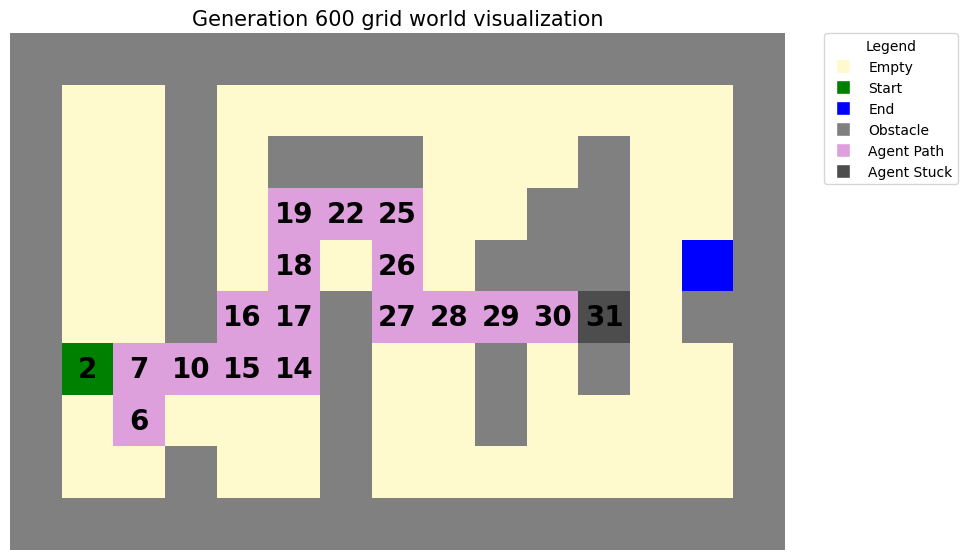

----------------------------------------------------------------------------------------------------

9. generation 700 grid world


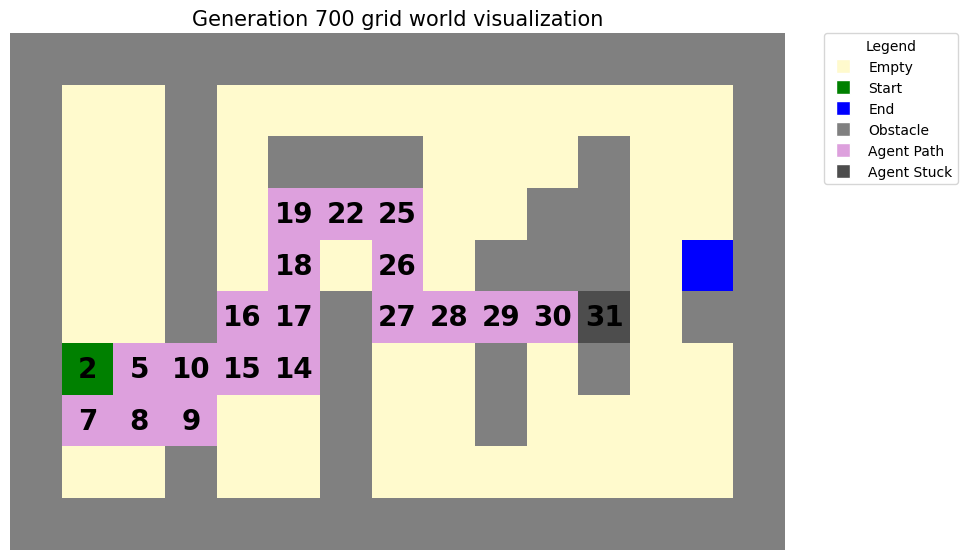

----------------------------------------------------------------------------------------------------

10. generation 800 grid world


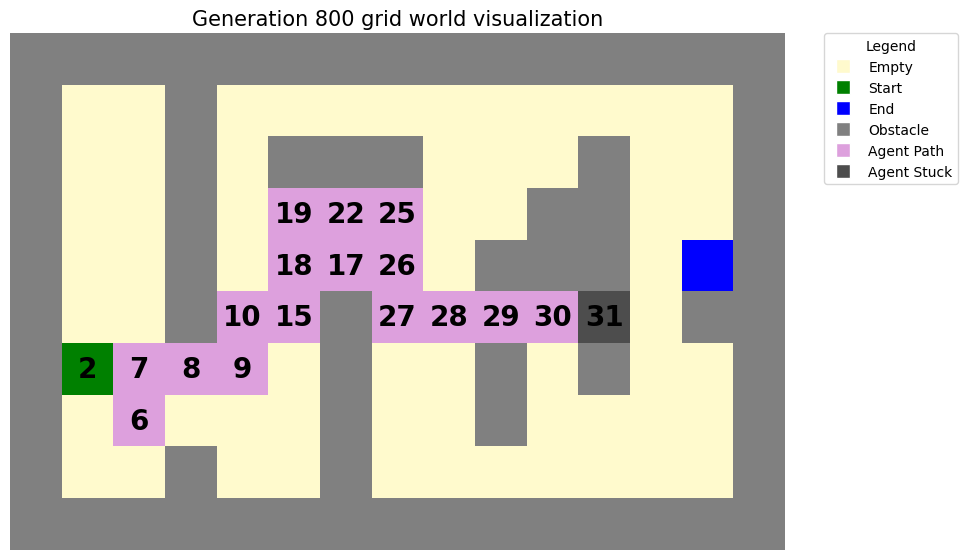

----------------------------------------------------------------------------------------------------

11. generation 900 grid world


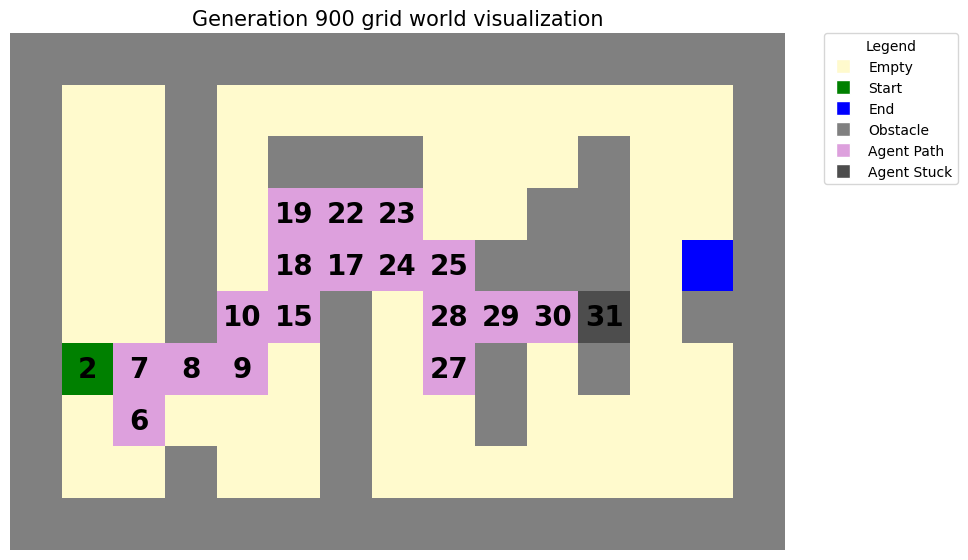

----------------------------------------------------------------------------------------------------

12. generation 1000 grid world


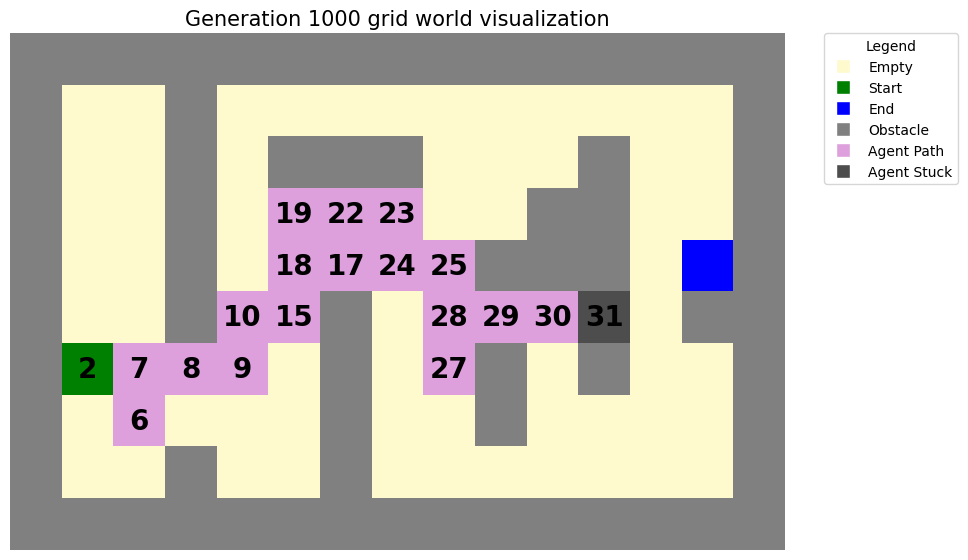

----------------------------------------------------------------------------------------------------



In [14]:
generation_step = generation // 10

counter = 1
for generation, grid_world in enumerate(best_grid_worlds, 1):
    if generation == 1 or generation == best_generation or generation%generation_step == 0:
        print(f"{counter}. generation {generation} grid world")
        title = f"Generation {generation} grid world visualization"
        fn.grid_world_visualization(grid_world, agent_path=best_population_paths[generation-1], title=title, agent_flag=1)
        print(LINE)
        print()
        counter += 1

In [15]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=BEST_TO_REST_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    step=generation_step, 
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(BEST_TO_REST_RESULTS_PATH, BEST_TO_REST_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 11/11 [03:01<00:00, 16.47s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/regular mutation/best_to_rest_results.mp4
Video creation finished!


frame=  331 fps=160 q=-1.0 Lsize=     382kB time=00:01:05.60 bitrate=  47.8kbits/s speed=31.7x    
video:379kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.031380%
[libx264 @ 0x55e822170380] frame I:2     Avg QP: 7.55  size: 19942
[libx264 @ 0x55e822170380] frame P:231   Avg QP:14.63  size:  1336
[libx264 @ 0x55e822170380] frame B:98    Avg QP:13.46  size:   393
[libx264 @ 0x55e822170380] consecutive B-frames: 43.5% 48.3%  8.2%  0.0%
[libx264 @ 0x55e822170380] mb I  I16..4: 84.6%  4.4% 11.0%
[libx264 @ 0x55e822170380] mb P  I16..4:  0.9%  0.3%  0.5%  P16..4:  1.2%  0.2%  0.1%  0.0%  0.0%    skip:97.0%
[libx264 @ 0x55e822170380] mb B  I16..4:  0.6%  0.2%  0.2%  B16..8:  1.4%  0.1%  0.1%  direct: 0.0%  skip:97.4%  L0:62.3% L1:36.1% BI: 1.6%
[libx264 @ 0x55e822170380] 8x8 transform intra:12.4% inter:53.4%
[libx264 @ 0x55e822170380] coded y,uvDC,uvAC intra: 14.2% 33.0% 28.3% inter: 0.4% 0.6% 0.5%
[libx264 @ 0x55e822170380] i16 v,h,dc,p: 68% 31%  1%  0%
[li

In [16]:
Video(BEST_TO_REST_VIDEO_PATH, embed=True)

## Hybrid evolutionary case

### Simulation

In [17]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    mutation_rate=MUTATION_RATE,
    crossover_type="hybrid",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE   
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 7.6158 - median score: 13.0384 - mean score: 12.3664 - steps: 10
----------------------------------------------------------------------------------------------------
 10. generation finished - best score: 7.0711 - median score: 7.2801 - mean score: 9.1982 - steps: 16
----------------------------------------------------------------------------------------------------
 20. generation finished - best score: 2.8284 - median score: 4.0 - mean score: 6.5327 - steps: 20
----------------------------------------------------------------------------------------------------
 30. generation finished - best score: 2.8284 - median score: 3.1623 - mean score: 6.2877 - steps: 20
----------------------------------------------------------------------------------------------------
 40. generation finished - best score: 2.8284 - median score: 4.0 - mean score: 6.3229 - 

### Result scores visualization

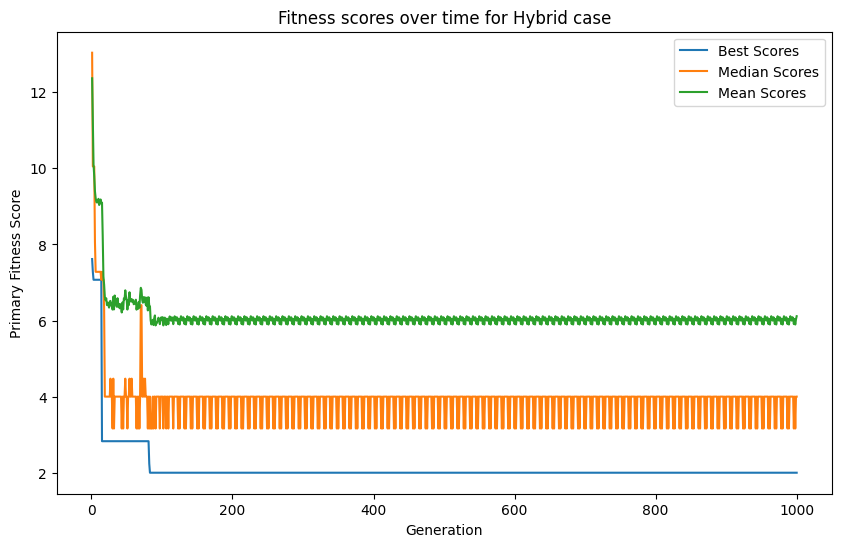

In [18]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for Hybrid case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

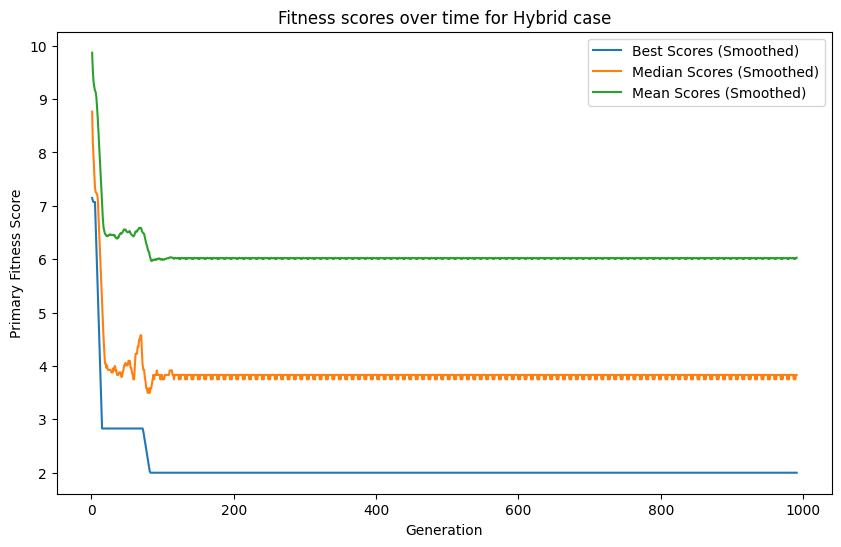

In [19]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for Hybrid case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


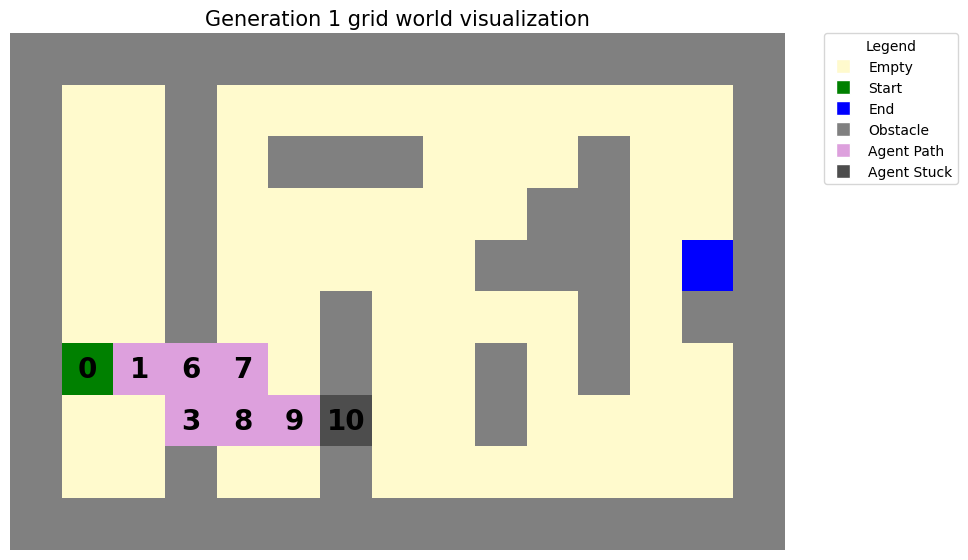

----------------------------------------------------------------------------------------------------

2. generation 83 grid world


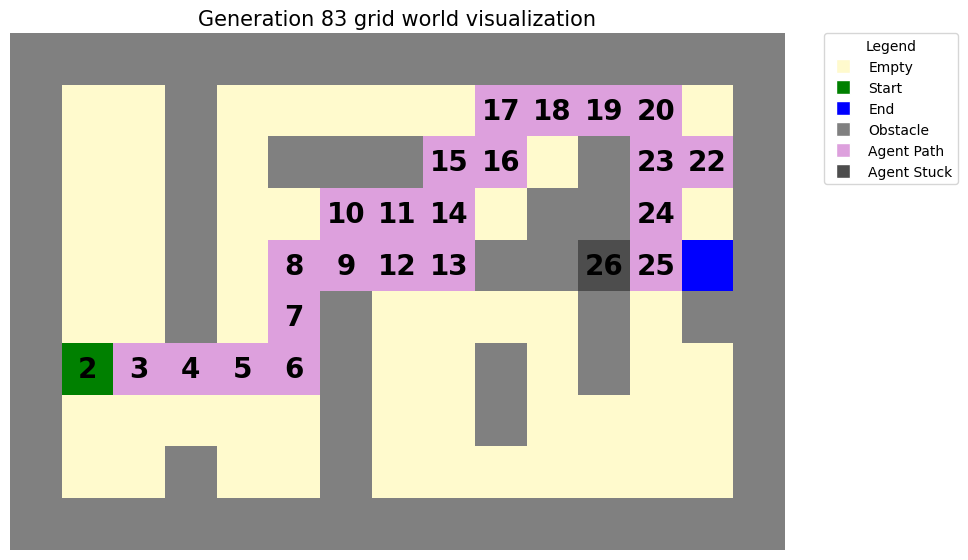

----------------------------------------------------------------------------------------------------

3. generation 100 grid world


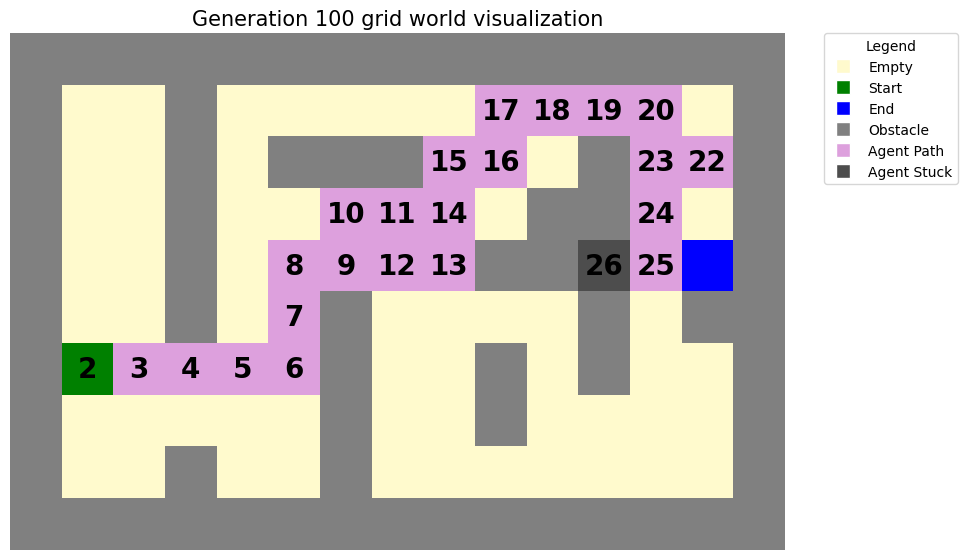

----------------------------------------------------------------------------------------------------

4. generation 200 grid world


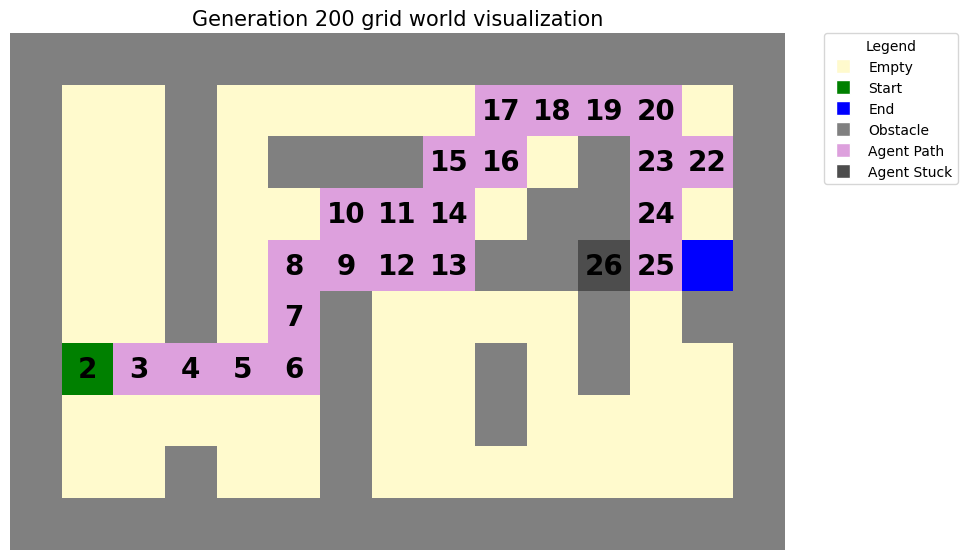

----------------------------------------------------------------------------------------------------

5. generation 300 grid world


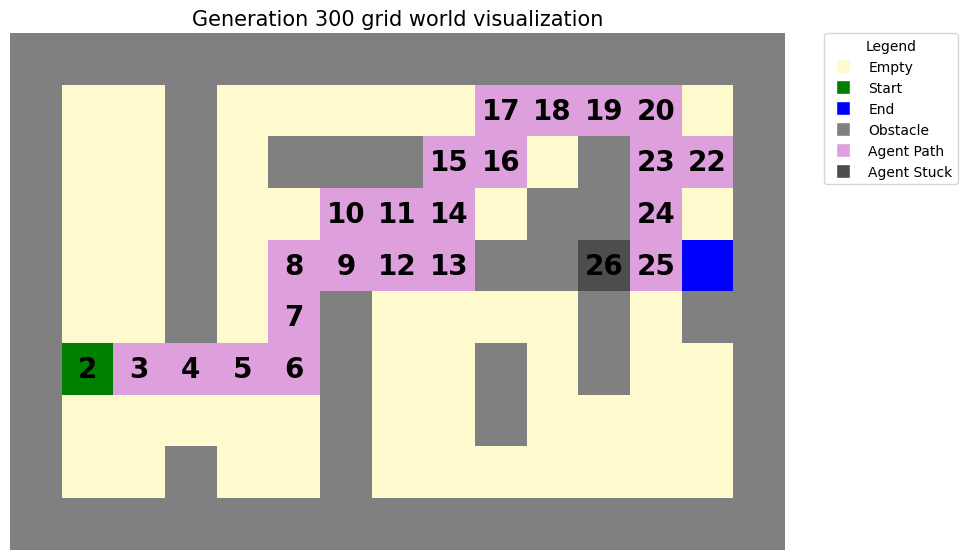

----------------------------------------------------------------------------------------------------

6. generation 400 grid world


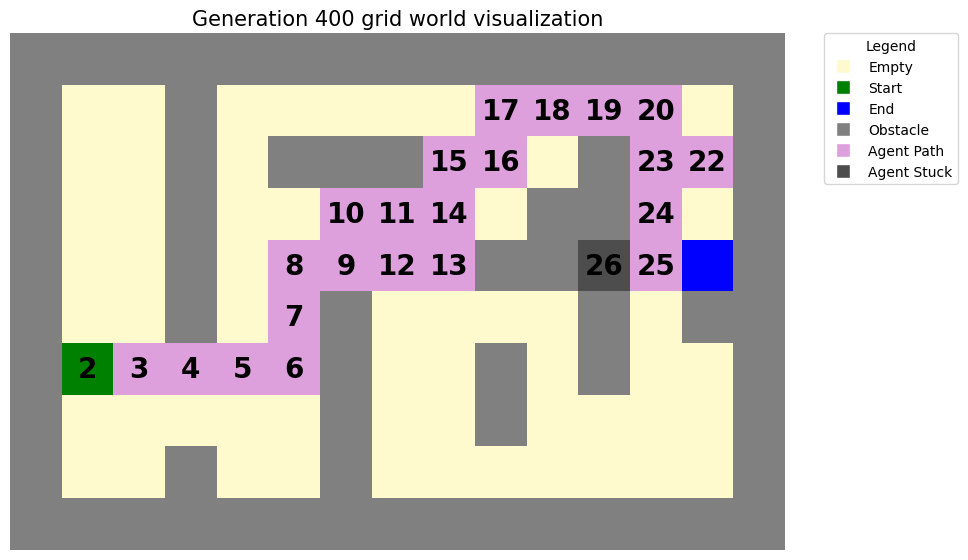

----------------------------------------------------------------------------------------------------

7. generation 500 grid world


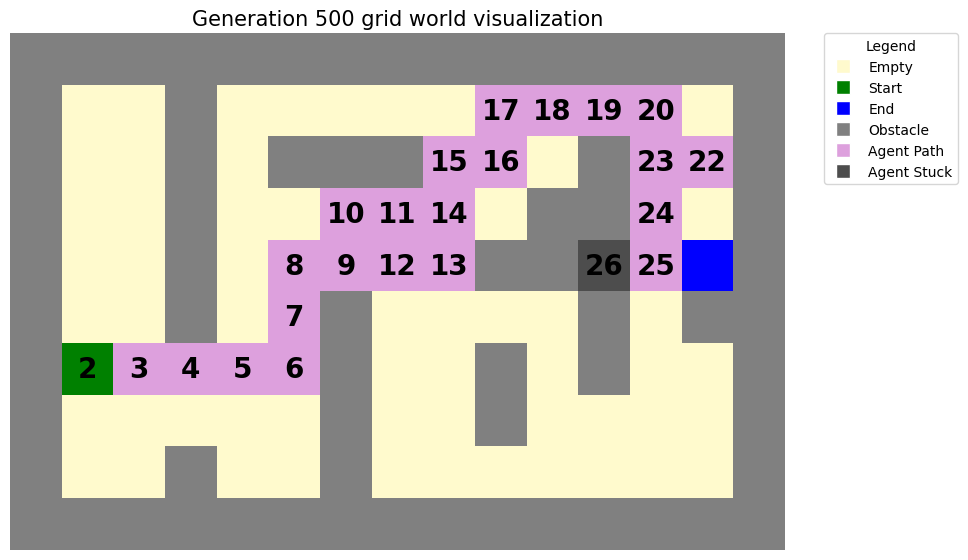

----------------------------------------------------------------------------------------------------

8. generation 600 grid world


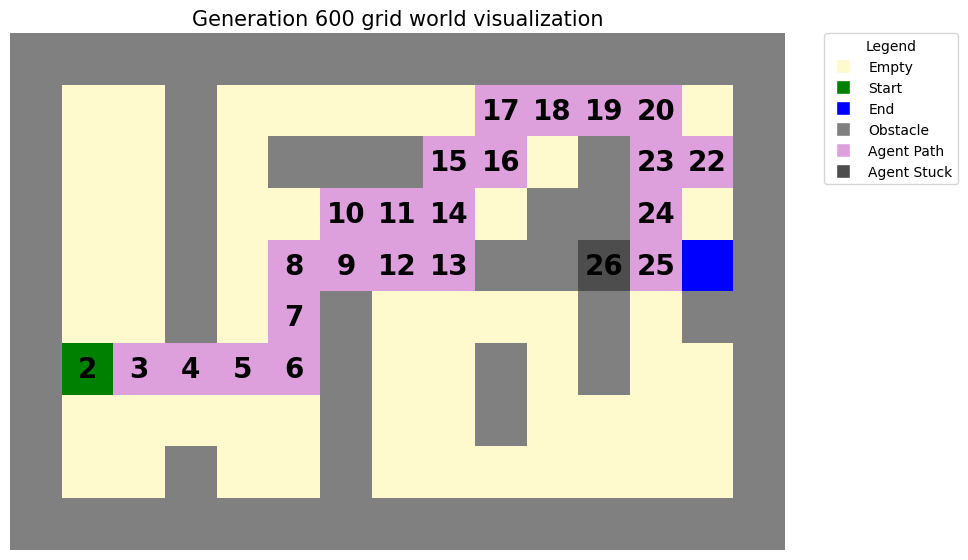

----------------------------------------------------------------------------------------------------

9. generation 700 grid world


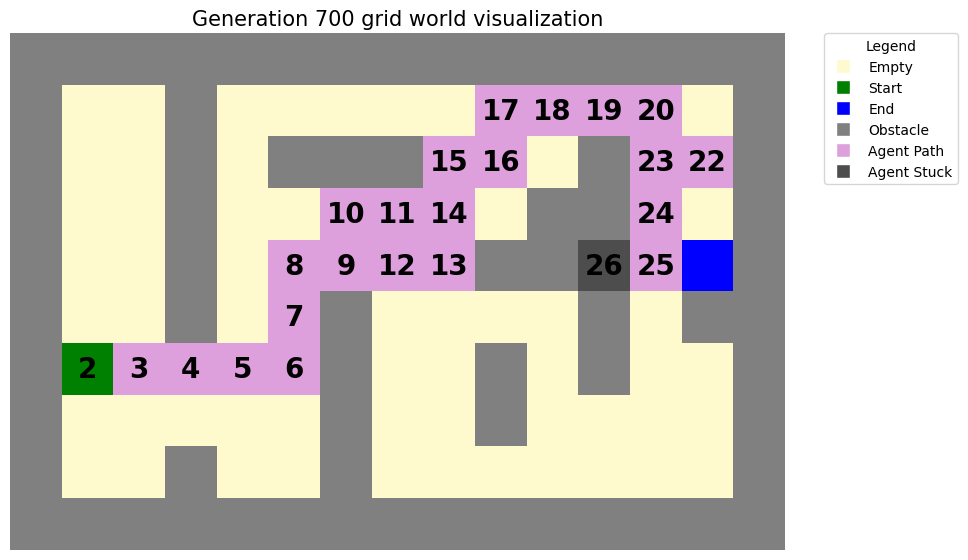

----------------------------------------------------------------------------------------------------

10. generation 800 grid world


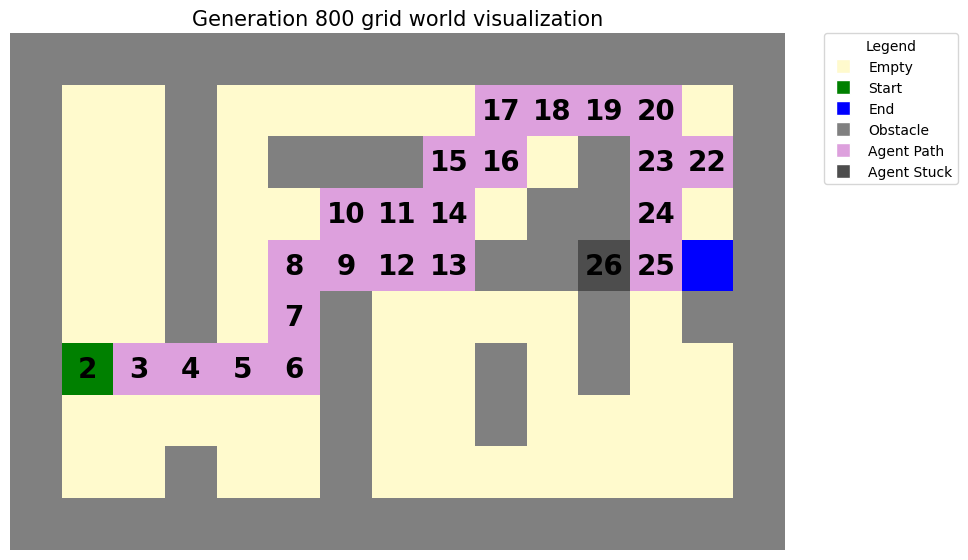

----------------------------------------------------------------------------------------------------

11. generation 900 grid world


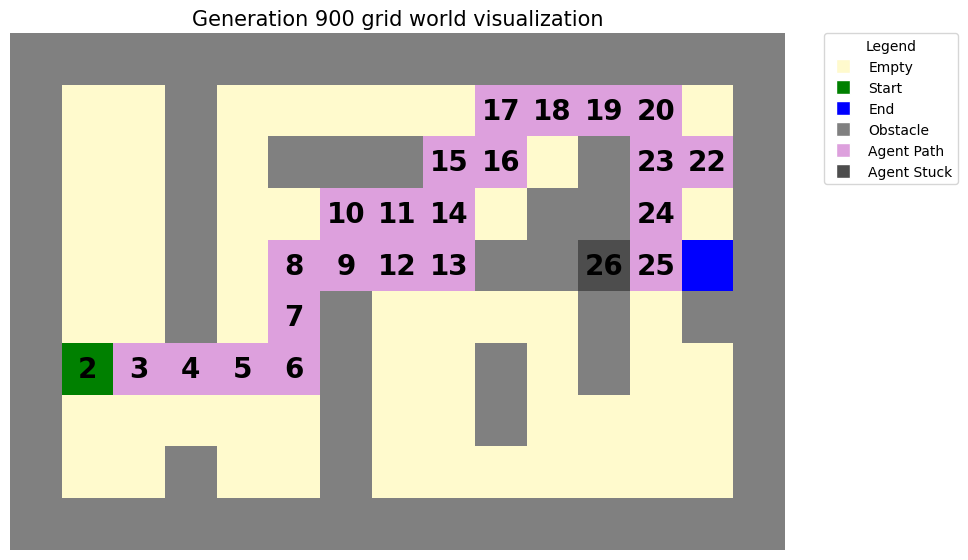

----------------------------------------------------------------------------------------------------

12. generation 1000 grid world


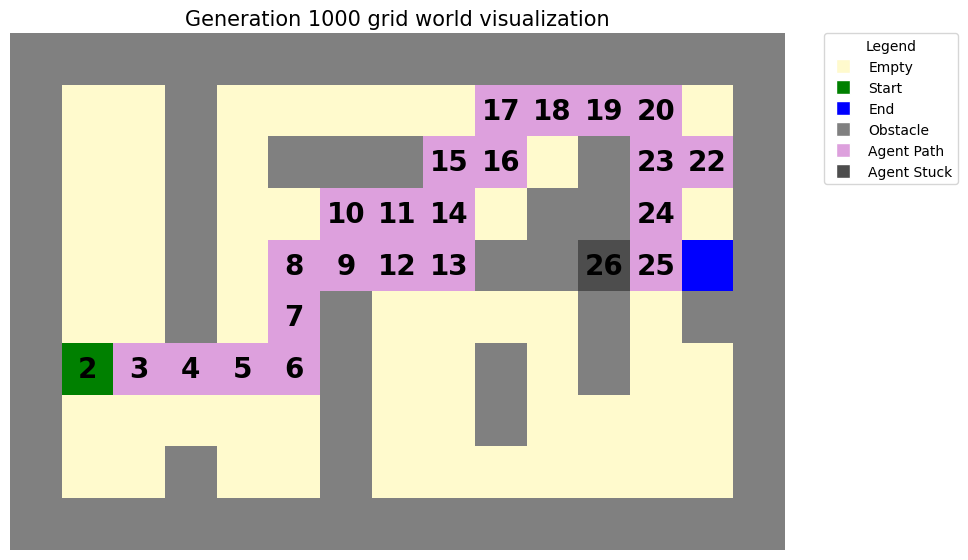

----------------------------------------------------------------------------------------------------



In [20]:
generation_step = generation // 10

counter = 1
for generation, grid_world in enumerate(best_grid_worlds, 1):
    if generation == 1 or generation == best_generation or generation%generation_step == 0:
        print(f"{counter}. generation {generation} grid world")
        title = f"Generation {generation} grid world visualization"
        fn.grid_world_visualization(grid_world, agent_path=best_population_paths[generation-1], title=title, agent_flag=1)
        print(LINE)
        print()
        counter += 1

In [22]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=HYBRID_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    step=generation_step, 
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(HYBRID_RESULTS_PATH, HYBRID_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 11/11 [02:21<00:00, 12.84s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/regular mutation/hybrid_results.mp4
Video creation finished!


frame=  281 fps=153 q=-1.0 Lsize=     402kB time=00:00:55.60 bitrate=  59.2kbits/s speed=30.4x    
video:398kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.921370%
[libx264 @ 0x5555cccd3180] frame I:2     Avg QP: 8.01  size: 20560
[libx264 @ 0x5555cccd3180] frame P:182   Avg QP:16.40  size:  1754
[libx264 @ 0x5555cccd3180] frame B:97    Avg QP:15.02  size:   483
[libx264 @ 0x5555cccd3180] consecutive B-frames: 33.1% 60.5%  6.4%  0.0%
[libx264 @ 0x5555cccd3180] mb I  I16..4: 83.6%  4.4% 12.1%
[libx264 @ 0x5555cccd3180] mb P  I16..4:  1.2%  0.3%  0.7%  P16..4:  1.4%  0.2%  0.1%  0.0%  0.0%    skip:96.0%
[libx264 @ 0x5555cccd3180] mb B  I16..4:  0.7%  0.3%  0.3%  B16..8:  1.5%  0.1%  0.0%  direct: 0.1%  skip:97.0%  L0:50.6% L1:48.5% BI: 0.9%
[libx264 @ 0x5555cccd3180] 8x8 transform intra:13.1% inter:54.3%
[libx264 @ 0x5555cccd3180] coded y,uvDC,uvAC intra: 14.8% 33.6% 27.9% inter: 0.4% 0.6% 0.5%
[libx264 @ 0x5555cccd3180] i16 v,h,dc,p: 66% 32%  2%  0%
[li

In [23]:
Video(HYBRID_VIDEO_PATH, embed=True)